In [2]:
import numpy as np
from scipy.io import wavfile
from scipy.signal import hilbert
import matplotlib.pyplot as plt

In [16]:
f_list = np.array([0,58,125,215,324,457,623,833,1088,1409,1808,2296,2905,3670,4611,5785,8000])
df = 44100/20000
f_idx = np.int16(f_list/df)

f_idx = [3628, 2623, 2091, 1664, 1317, 1041, 819, 639, 493, 377, 282, 207, 146, 97, 56, 26, 0]
print(f_idx)

[3628, 2623, 2091, 1664, 1317, 1041, 819, 639, 493, 377, 282, 207, 146, 97, 56, 26, 0]


0


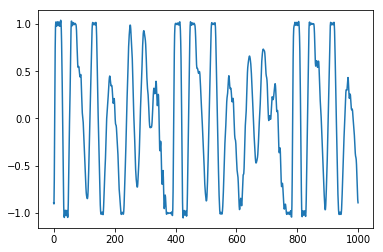

2


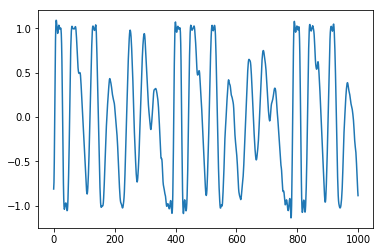

4


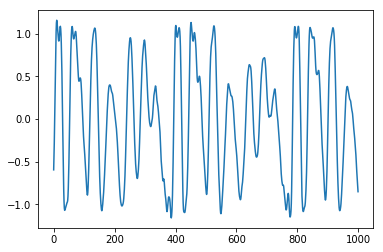

6


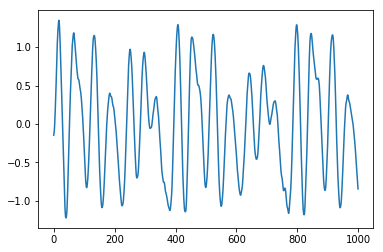

8


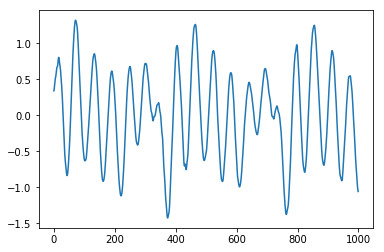

10


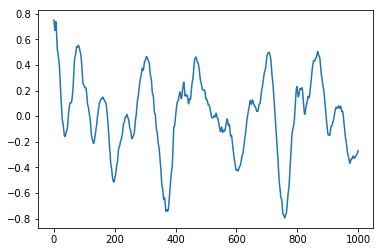

12


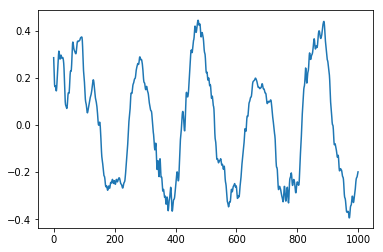

14


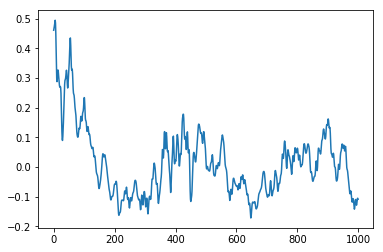

16


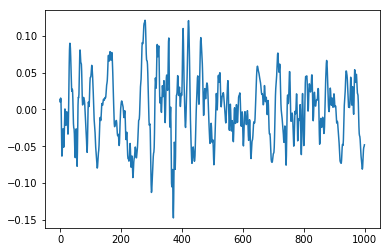

In [30]:
for n_band in range(0,17,2):
    print(n_band)
    for p_num in range(1,2):
        for v_num in range(1,2):
            sr, sound_ = wavfile.read('wav/OS1_%d_%d.wav'%(p_num, v_num))
            sound = ((2./65535.) * (sound_.astype(np.float32) - 32767) + 1.)

            signal = np.zeros(np.shape(sound))
            fft_wav = np.fft.rfft(sound)
            for b in range(len(f_idx)-1):
                dfft = fft_wav.copy()
                dfft[f_idx[b]:]=0
                dfft[:f_idx[b+1]]=0
                idfft = np.fft.irfft(dfft)
                denv = np.abs(hilbert(idfft))
                
                mod_signal = denv*(2*np.random.random(np.shape(denv))-1)
                mod_fft = np.fft.rfft(mod_signal.copy())
                mod_fft[f_idx[b]:] = 0
                mod_fft[:f_idx[b+1]] = 0
                
                mod_signal_ = np.fft.irfft(mod_fft)
                if b<n_band:
                    signal += mod_signal_
                else:
                    signal += idfft
            plt.plot(signal[:1000])
            plt.show()
#             wavfile.write('wav_env/%dband_%d_%d.wav'%(n_band, p_num, v_num), 44100, np.float32(signal))
